# Taller 3
##### By Guillermo De Mendoza

### Import libraries

In [79]:
import numpy as np
import matplotlib.pyplot as plt 
import math
import os
import io

from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

import pandas as pd
from pandas_profiling import ProfileReport

import seaborn as sns

### Library options

In [2]:
plt.rc("font", size=14)

sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

### Read data

In [3]:
file_path = "C:\\Users\\Gmendoza\\Desktop\\ANALISIS DE DATOS\\"
file_name = "Banking.csv"

data = pd.read_csv(file_path+file_name)

### View data

In [4]:
#view top 10 rows
data.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,...,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,...,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,...,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,...,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1
5,30,management,divorced,basic.4y,no,yes,no,cellular,jul,tue,...,8,999,0,nonexistent,1.4,93.918,-42.7,4.961,5228.1,0
6,37,blue-collar,married,basic.4y,no,yes,no,cellular,may,thu,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.327,5099.1,0
7,39,blue-collar,divorced,basic.9y,no,yes,no,cellular,may,fri,...,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,0
8,36,admin.,married,university.degree,no,no,no,cellular,jun,mon,...,1,3,1,success,-2.9,92.963,-40.8,1.266,5076.2,1
9,27,blue-collar,single,basic.4y,no,yes,no,cellular,apr,thu,...,2,999,1,failure,-1.8,93.075,-47.1,1.410,5099.1,0


### Generate profile

In [5]:
#Generate profile information
profile_info = ProfileReport(data)
profile_info_html = profile_info.to_html()

#Export information
file_profile_name = file_path + "profile.html"
with io.open(file_profile_name, "w", encoding="utf-8") as f:
    f.write(profile_info_html)

### Obtain individual categorical values

In [6]:
jobs_individual_values = data["job"].unique()
marital_individual_values = data["marital"].unique()
education_individual_values = data["education"].unique()
default_individual_values = data["default"].unique()
housing_individual_values = data["housing"].unique()
loan_individual_values = data["loan"].unique()
contact_individual_values = data["contact"].unique()
month_individual_values = data["month"].unique()
day_of_week_individual_values = data["day_of_week"].unique()
poutcome_individual_values = data["poutcome"].unique()

In [9]:
print("jobs: %s \n"%(data["job"].unique()))
print("marital: %s \n"%(data["marital"].unique()))
print("education: %s \n"%(data["education"].unique()))
print("default: %s \n"%(data["default"].unique()))
print("housing: %s \n"%(data["housing"].unique()))
print("loan: %s \n"%(data["loan"].unique()))
print("contact: %s \n"%(data["contact"].unique()))
print("month: %s \n"%(data["month"].unique()))
print("day_of_week: %s \n"%(data["day_of_week"].unique()))
print("poutcome: %s \n"%(data["poutcome"].unique()))

jobs: ['blue-collar' 'technician' 'management' 'services' 'retired' 'admin.'
 'housemaid' 'unemployed' 'entrepreneur' 'self-employed' 'unknown'
 'student'] 

marital: ['married' 'single' 'divorced' 'unknown'] 

education: ['basic.4y' 'unknown' 'university.degree' 'high.school' 'basic.9y'
 'professional.course' 'basic.6y' 'illiterate'] 

default: ['unknown' 'no' 'yes'] 

housing: ['yes' 'no' 'unknown'] 

loan: ['no' 'yes' 'unknown'] 

contact: ['cellular' 'telephone'] 

month: ['aug' 'nov' 'jun' 'apr' 'jul' 'may' 'oct' 'mar' 'sep' 'dec'] 

day_of_week: ['thu' 'fri' 'tue' 'mon' 'wed'] 

poutcome: ['nonexistent' 'success' 'failure'] 



### Agrupar datos (Limpieza)

In [10]:
#education
data['education']=np.where(data['education'] =='basic.9y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.4y', 'Basic', data['education'])
data['education']=np.where(data['education'] =='basic.6y', 'Basic', data['education'])
print("education: %s"%(data["education"].unique()))

education: ['Basic' 'unknown' 'university.degree' 'high.school' 'professional.course'
 'illiterate']


### Graficas de variables

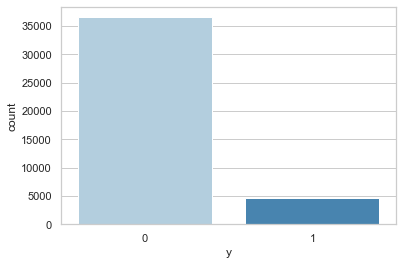

In [18]:
sns.countplot(x='y',data=data,palette='Blues')

### Graficas de variables - Categoricas

### 1. Job Title

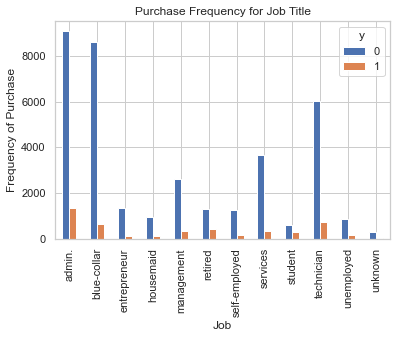

In [13]:
pd.crosstab(data.job,data.y).plot(kind='bar')
plt.title('Purchase Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 2. Marital status

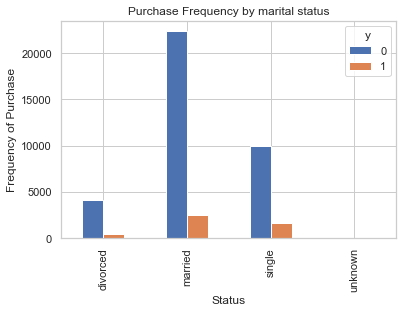

In [16]:
pd.crosstab(data.marital,data.y).plot(kind='bar')
plt.title('Purchase Frequency by marital status')
plt.xlabel('Status')
plt.ylabel('Frequency of Purchase')
#plt.savefig('Marital')
plt.show()

### 3. Education level

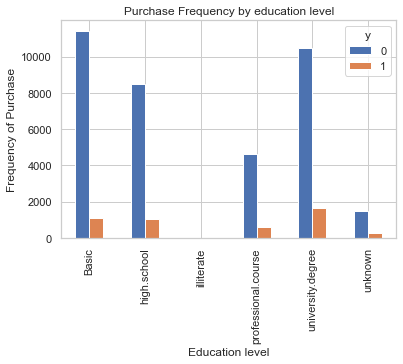

In [15]:
pd.crosstab(data.education,data.y).plot(kind='bar')
plt.title('Purchase Frequency by education level')
plt.xlabel('Education level')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 4. Default status

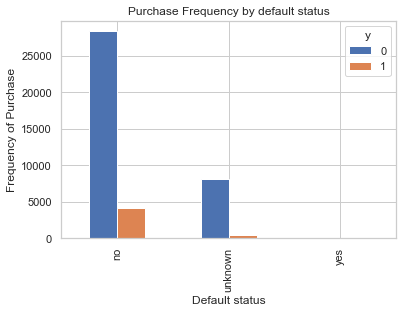

In [17]:
pd.crosstab(data.default,data.y).plot(kind='bar')
plt.title('Purchase Frequency by default status')
plt.xlabel('Default status')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 5. Housing status

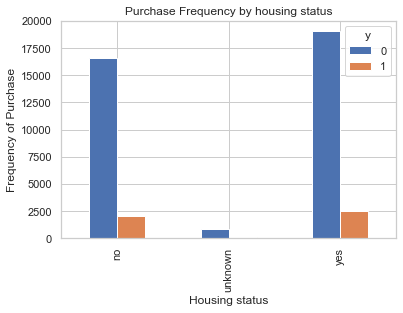

In [18]:
pd.crosstab(data.housing,data.y).plot(kind='bar')
plt.title('Purchase Frequency by housing status')
plt.xlabel('Housing status')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 6. Loan status

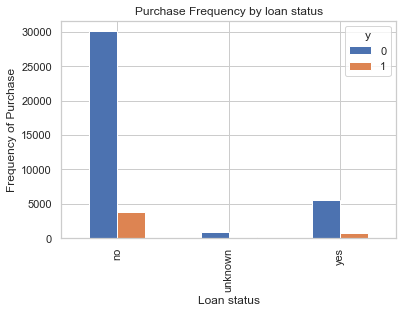

In [20]:
pd.crosstab(data.loan,data.y).plot(kind='bar')
plt.title('Purchase Frequency by loan status')
plt.xlabel('Loan status')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 7. Contact channel

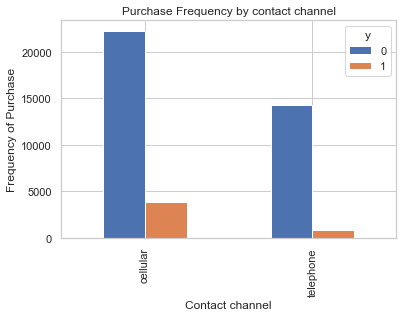

In [22]:
pd.crosstab(data.contact,data.y).plot(kind='bar')
plt.title('Purchase Frequency by contact channel')
plt.xlabel('Contact channel')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 8. Month periods

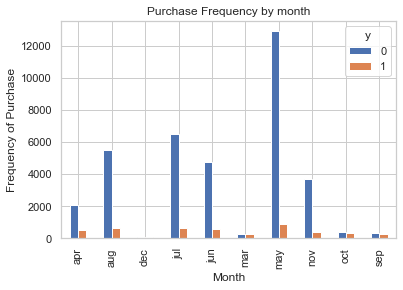

In [25]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Purchase Frequency by month')
plt.xlabel('Month')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 9. Day of the week

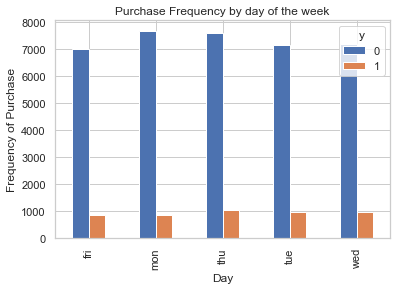

In [26]:
pd.crosstab(data.day_of_week,data.y).plot(kind='bar')
plt.title('Purchase Frequency by day of the week')
plt.xlabel('Day')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### 10. By outcome

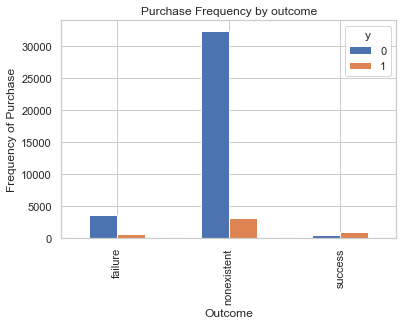

In [29]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Purchase Frequency by outcome')
plt.xlabel('Outcome')
plt.ylabel('Frequency of Purchase')
#plt.savefig('purchase_fre_job')
plt.show()

### Graficas de variables - Numericas

In [89]:
# metodo utilitario para obtener graficas
def obtainListForPlotting(xValues,yValues,filter_value):
    
    values = {}
    for i in range(len(xValues)):
        if yValues[i] == filter_value:
            if xValues[i] in values:
                v = values[xValues[i]]
                v += 1
                values[xValues[i]] = v
            else:
                values[xValues[i]] = 1
                
 
    keys = []
    for k in values.keys():
        keys.append(k)
    keys.sort()
        
    x = []
    y = []
    
    for e in keys:
        x.append(e)
        y.append(values[e])

    return x,y

def obtainListForPlottingRounding(xValues,yValues,filter_value):
    
    values = {}
    for i in range(len(xValues)):
        if yValues[i] == filter_value:
            x_copy_value = round(xValues[i],1)
            if xValues[i] in values:
                v = values[x_copy_value]
                v += 1
                values[x_copy_value] = v
            else:
                values[x_copy_value] = 1
                
 
    keys = []
    for k in values.keys():
        keys.append(k)
    keys.sort()
        
    x = []
    y = []
    
    for e in keys:
        x.append(e)
        y.append(values[e])

    return x,y

### 11. By age

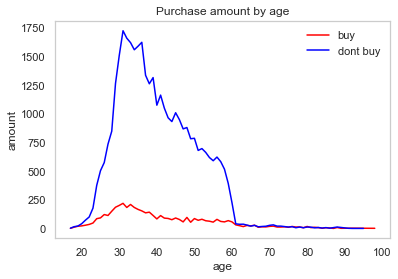

In [90]:
xL1,yL1 = obtainListForPlotting(data.age,data.y,1)
xL0,yL0 = obtainListForPlotting(data.age,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by age')
plt.xlabel('age')
plt.ylabel('amount')
plt.legend(loc='upper right', frameon=False) 
plt.grid()
plt.show()

### 12. by duration

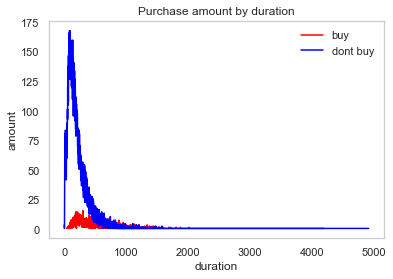

In [96]:
xL1,yL1 = obtainListForPlotting(data.duration,data.y,1)
xL0,yL0 = obtainListForPlotting(data.duration,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by duration')
plt.xlabel('duration')
plt.ylabel('amount')
plt.legend(loc='upper right', frameon=False) 
plt.grid()
plt.show()

### 12. By campaign

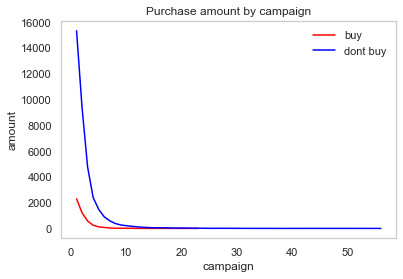

In [69]:
xL1,yL1 = obtainListForPlotting(data.campaign,data.y,1)
xL0,yL0 = obtainListForPlotting(data.campaign,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by campaign')
plt.xlabel('campaign')
plt.ylabel('amount')
plt.legend(loc='upper right', frameon=False) 
plt.grid()
plt.show()

### 13. By pdays

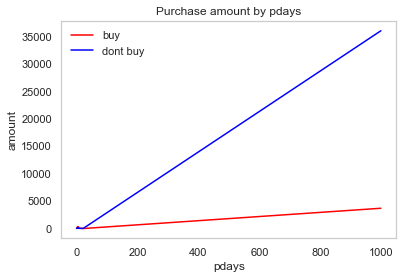

In [71]:
xL1,yL1 = obtainListForPlotting(data.pdays,data.y,1)
xL0,yL0 = obtainListForPlotting(data.pdays,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by pdays')
plt.xlabel('pdays')
plt.ylabel('amount')
plt.legend(loc='upper left', frameon=False) 
plt.grid()
plt.show()

### 14. previous

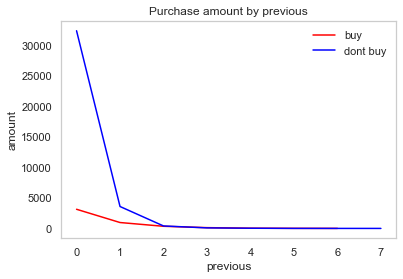

In [73]:
xL1,yL1 = obtainListForPlotting(data.previous,data.y,1)
xL0,yL0 = obtainListForPlotting(data.previous,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by previous')
plt.xlabel('previous')
plt.ylabel('amount')
plt.legend(loc='upper right', frameon=False) 
plt.grid()
plt.show()

### 15. emp_var_rate

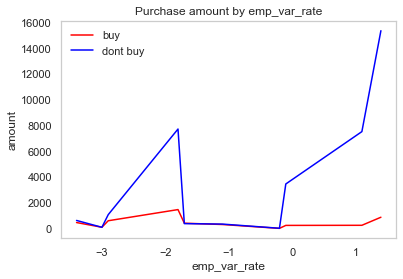

In [94]:
xL1,yL1 = obtainListForPlottingRounding(data.emp_var_rate,data.y,1)
xL0,yL0 = obtainListForPlottingRounding(data.emp_var_rate,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by emp_var_rate')
plt.xlabel('emp_var_rate')
plt.ylabel('amount')
plt.legend(loc='upper left', frameon=False) 
plt.grid()
plt.show()

### 16. cons_price_idx

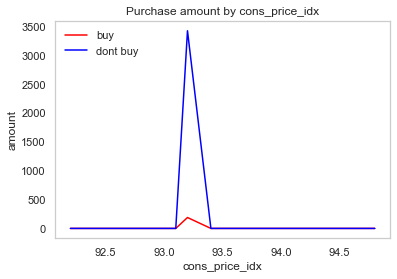

In [93]:
xL1,yL1 = obtainListForPlottingRounding(data.cons_price_idx,data.y,1)
xL0,yL0 = obtainListForPlottingRounding(data.cons_price_idx,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by cons_price_idx')
plt.xlabel('cons_price_idx')
plt.ylabel('amount')
plt.legend(loc='upper left', frameon=False) 
plt.grid()
plt.show()

### 17. cons_conf_idx	

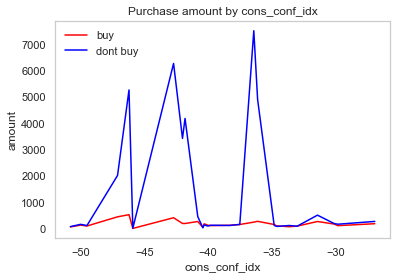

In [91]:
xL1,yL1 = obtainListForPlottingRounding(data.cons_conf_idx,data.y,1)
xL0,yL0 = obtainListForPlottingRounding(data.cons_conf_idx,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by cons_conf_idx')
plt.xlabel('cons_conf_idx')
plt.ylabel('amount')
plt.legend(loc='upper left', frameon=False) 
plt.grid()
plt.show()

### 18. euribor3m

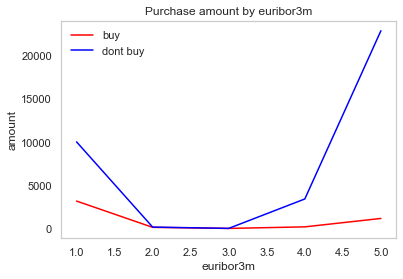

In [92]:
xL1,yL1 = obtainListForPlottingRounding(data.euribor3m,data.y,1)
xL0,yL0 = obtainListForPlottingRounding(data.euribor3m,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by euribor3m')
plt.xlabel('euribor3m')
plt.ylabel('amount')
plt.legend(loc='upper left', frameon=False) 
plt.grid()
plt.show()

### 19. nr_employed

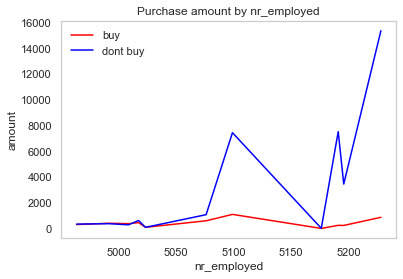

In [95]:
xL1,yL1 = obtainListForPlottingRounding(data.nr_employed,data.y,1)
xL0,yL0 = obtainListForPlottingRounding(data.nr_employed,data.y,0)

plt.plot(xL1,yL1, color="red", label='buy')
plt.plot(xL0,yL0, color="blue", label='dont buy')
plt.title('Purchase amount by nr_employed')
plt.xlabel('nr_employed')
plt.ylabel('amount')
plt.legend(loc='upper left', frameon=False) 
plt.grid()
plt.show()